In [2]:
import os
import pandas as pd
import json
import pickle
from collections import defaultdict
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

import torch

import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
    
from src.data import load_source, slice_d
from src.config import Config, get_option_fallback
from knowledge_tracing.trainer import Trainer

/root/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/root/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
with open('../data/Asteria_Eng_ver5.1_dic.pickle', 'rb') as f:
    problems_dic = pickle.load(f)

In [4]:
projectdir = Path('/code')
assert projectdir.exists()

## 学習者によらない正解率を出す

In [ ]:
data = load_source('Asteria_Eng_ver5')

correct_count = defaultdict(int)
wrong_count = defaultdict(int)

for seq in data:
    for x in seq:
        if x[1] == 1:
            correct_count[x[0]] += 1
        else:
            wrong_count[x[0]] += 1

correctness = []
for sid in correct_count.keys():
#     print('{:.2f} ({}/{})'.format(correct_count[sid] / (correct_count[sid]+wrong_count[sid]), correct_count[sid], correct_count[sid]+wrong_count[sid]))
    correctness.append(correct_count[sid] / (correct_count[sid]+wrong_count[sid]))

In [ ]:
# correctness = np.array(correctness) 
over_080 = len([c for c in correctness if c > 0.8])
print('Over 0.80: {:.1f}%({}/{})'.format(over_080/len(correctness)*100, over_080, len(correctness)))
sns.distplot(correctness)

# スキルごとの正解率を出す

In [ ]:
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
from src.config import Config
from knowledge_tracing.trainer import Trainer

In [ ]:
## FOR DKVMN
projectdir = Path('/code')
assert projectdir.exists(), 'you are not in docker environment'
with open(projectdir / 'output/z_200109_dkvmn/dkvmn/report/20200116-1131/dkvmn.json') as f:
    config_dict = json.load(f)['config']
    config_dict['exp_name'] += 'jupyter'
    config_dict['batch_size'] = 32
    config_dict['load_model'] = \
        'output/z_200109_dkvmn/dkvmn/checkpoints/20200116-1131/dkvmn_auc0.6185_e100.model'
config = Config(config_dict, projectdir=projectdir)
print(config_dict['model_name'])
trainer = Trainer(config)
# trainer.evaluate_model()

good = 0
bad = 0
count = 0
for v in problems_dic.values():
    # wrong
    
    wro = trainer.model.loss_batch(torch.Tensor([[(v,0) for _ in range(20)] for _ in range(32)]),
                        torch.Tensor([[(v,0) for _ in range(20)] for _ in range(32)]))
    wro = wro['filtered_pred']
    # correct
    cor = trainer.model.loss_batch(torch.Tensor([[(v,1) for _ in range(20)] for _ in range(32)]),
                        torch.Tensor([[(v,1) for _ in range(20)] for _ in range(32)]))
    cor = cor['filtered_pred']
    
    count += 1
    if count == 1:
        continue
    
#     print((cor - wro))
    if (cor - wro)[-1].item() < 0:
        bad += 1
    else:
        good += 1
     
print(good, bad)

In [ ]:
projectdir = Path('/code')
assert projectdir.exists(), 'you are not in docker environment'
with open(projectdir / 'output/z_1128_ksdkt/20191128-1424_seq20ks00_ksdkt/report/ksdkt.json') as f:
    config_dict = json.load(f)['config']
    config_dict['exp_name'] += 'jupyter'
    config_dict['batch_size'] = 1
    config_dict['pad'] = False
    config_dict['load_model'] = \
        'output/z_1128_ksdkt/20191128-1424_seq20ks00_ksdkt/checkpoints/ksdkt_auc0.6632_e700.model'
config = Config(config_dict, projectdir=projectdir)
trainer = Trainer(config)
# trainer.evaluate_model()

good = 0
bad = 0

for v in problems_dic.values():
    # wrong
    wro = trainer.model(torch.Tensor([(v,0) for _ in range(20)]).unsqueeze(0),
                        torch.Tensor([(v,0) for _ in range(20)]).unsqueeze(0))
    wro = wro['pred_prob'] 
    # correct
    cor = trainer.model(torch.Tensor([(v,1) for _ in range(20)]).unsqueeze(0),
                        torch.Tensor([(v,1) for _ in range(20)]).unsqueeze(0))
    cor = cor['pred_prob']
    if (cor - wro)[-1].item() < 0:
        bad += 1
    else:
        good += 1
        
print(good, bad)

In [ ]:
projectdir = Path('/code')
assert projectdir.exists(), 'you are not in docker environment'
with open(projectdir / 'output/z_1128_ksdkt/20191128-1428_seq20ks05_ksdkt/report/ksdkt.json') as f:
    config_dict = json.load(f)['config']
    config_dict['exp_name'] += 'jupyter'
    config_dict['batch_size'] = 1
    config_dict['load_model'] = \
        '../output/z_1128_ksdkt/20191128-1428_seq20ks05_ksdkt/checkpoints/ksdkt_auc0.6618_e700.model'
config = Config(config_dict, projectdir=projectdir)
trainer = Trainer(config)
# trainer.evaluate_model()

good = 0
bad = 0

for v in problems_dic.values():
    # wrong
    wro = trainer.model(torch.Tensor([(v,0) for _ in range(20)]).unsqueeze(0),
                        torch.Tensor([(v,0) for _ in range(20)]).unsqueeze(0))
    wro = wro['pred_prob']
    # correct
    cor = trainer.model(torch.Tensor([(v,1) for _ in range(20)]).unsqueeze(0),
                        torch.Tensor([(v,1) for _ in range(20)]).unsqueeze(0))
    cor = cor['pred_prob']
    if (cor - wro)[-1].item() < 0:
        bad += 1
    else:
        good += 1
        
print(good, bad)

In [ ]:
projectdir = Path('/code')
assert projectdir.exists(), 'you are not in docker environment'
with open(projectdir / 'output/z_1128_ksdkt/20191128-1433_seq11ks00_ksdkt/report/ksdkt.json') as f:
    config_dict = json.load(f)['config']
    config_dict['exp_name'] += 'jupyter'
    config_dict['batch_size'] = 1
    config_dict['load_model'] = \
        '../output/z_1128_ksdkt/20191128-1433_seq11ks00_ksdkt/checkpoints/ksdkt_auc0.6216_e300.model'
config = Config(config_dict, projectdir=projectdir)
trainer = Trainer(config)
# trainer.evaluate_model()

good = 0
bad = 0

for v in problems_dic.values():
    # wrong
    wro = trainer.model(torch.Tensor([(v,0) for _ in range(11)]).unsqueeze(0),
                        torch.Tensor([(v,0) for _ in range(11)]).unsqueeze(0))
    wro = wro['pred_prob']
    # correct
    cor = trainer.model(torch.Tensor([(v,1) for _ in range(11)]).unsqueeze(0),
                        torch.Tensor([(v,1) for _ in range(11)]).unsqueeze(0))
    cor = cor['pred_prob']
    if (cor - wro)[-1].item() < 0:
        bad += 1
    else:
        good += 1
        
print(good, bad)

In [ ]:
projectdir = Path('/code')
assert projectdir.exists(), 'you are not in docker environment'
with open(projectdir / 'output/z_1128_ksdkt/20191128-1441_seq11ks05_ksdkt/report/ksdkt.json') as f:
    config_dict = json.load(f)['config']
    config_dict['exp_name'] += 'jupyter'
    config_dict['batch_size'] = 1
    config_dict['load_model'] = \
        '../output/z_1128_ksdkt/20191128-1441_seq11ks05_ksdkt/checkpoints/ksdkt_auc0.6401_e900.model'
config = Config(config_dict, projectdir=projectdir)
trainer = Trainer(config)
# trainer.evaluate_model()

good = 0
bad = 0

for v in problems_dic.values():
    # wrong
    wro = trainer.model(torch.Tensor([(v,0) for _ in range(11)]).unsqueeze(0),
                        torch.Tensor([(v,0) for _ in range(11)]).unsqueeze(0))
    wro = wro['pred_prob']
    # correct
    cor = trainer.model(torch.Tensor([(v,1) for _ in range(11)]).unsqueeze(0),
                        torch.Tensor([(v,1) for _ in range(11)]).unsqueeze(0))
    cor = cor['pred_prob']
    if (cor - wro)[-1].item() < 0:
        bad += 1
    else:
        good += 1
        
print(good, bad)

In [ ]:
projectdir = Path('/code')
assert projectdir.exists(), 'you are not in docker environment'
with open(projectdir / 'output/z_1128_ksdkt/20191128-1441_seq11ks05_ksdkt/report/ksdkt.json') as f:
    config_dict = json.load(f)['config']
    config_dict['exp_name'] += 'jupyter'
    config_dict['batch_size'] = 1
    config_dict['load_model'] = \
        '../output/z_1128_ksdkt/20191128-1441_seq11ks05_ksdkt/checkpoints/ksdkt_auc0.6401_e900.model'
config = Config(config_dict, projectdir=projectdir)
trainer = Trainer(config)
trainer.evaluate_model()

# good = 0
# bad = 0
# for v in problems_dic.values():
#     # wrong
#     wro = trainer.model(torch.Tensor([(v,0) for _ in range(11)]).unsqueeze(0),
#                         torch.Tensor([(v,0) for _ in range(11)]).unsqueeze(0))
#     wro = wro['pred_prob']
#     # correct
#     cor = trainer.model(torch.Tensor([(v,1) for _ in range(11)]).unsqueeze(0),
#                         torch.Tensor([(v,1) for _ in range(11)]).unsqueeze(0))
#     cor = cor['pred_prob']
#     if (cor - wro)[-1].item() < 0:
#         bad += 1
#     else:
#         good += 1
# print(good, bad)

### スケールを固定するバージョン

In [ ]:
data = load_source('Asteria_Eng_ver5')

correct_count = defaultdict(int)
wrong_count = defaultdict(int)

for seq in data:
    for x in seq:
        if x[1] == 1:
            correct_count[x[0]] += 1
        else:
            wrong_count[x[0]] += 1

correctness = dict()
for sid in correct_count.keys():
#     print('{:.2f} ({}/{})'.format(correct_count[sid] / (correct_count[sid]+wrong_count[sid]), correct_count[sid], correct_count[sid]+wrong_count[sid]))
    correctness[sid] = (correct_count[sid] / (correct_count[sid]+wrong_count[sid]))

## 学習済みモデルでダミーを評価する

In [ ]:
checkpoint_path = projectdir / 'output/z_1219_learn_w_sanity_dummy/20191219-1320_seq20_ksdkt/checkpoints/ksdkt_auc0.6736_e200.model'
config_dic = {
    "debug": False,
    "cuda": True,
    "model_name": "ksdkt",
    "load_model": str(projectdir / "output/z_1219_learn_w_sanity_dummy/20191219-1320_seq20_ksdkt/checkpoints/ksdkt_auc0.6736_e200.model"),
    "source_data": "Asteria_Eng_ver5",
    "n_skills": 326,
    "sequence_size": 20,
    "epoch_size": 200,
    "pre_dummy_epoch_size": 10,
    "batch_size": 100,
    "lr": 0.05,
    "waviness_l1": False,
    "waviness_l2": False,
    "lambda_l1": 0.0,
    "lambda_l2": 0.0,
    "ksvector_l1": 0.0,
    "eddkt": {
      "ks_loss": False,
      "extend_backward": 0,
      "extend_forward": 0,
      "hidden_size": 200,
      "n_layers": 2,
      "preserved_tokens": 2,
      "dropout_rate": 0.6
    },
    "dkt": {
      "batch_size": 100,
      "hidden_size": 200,
      "n_layers": 2,
      "bidirectional": False,
      "preserved_tokens": 2,
      "dropout_rate": 0.6
    },
    "config_name": "z_1219_learn_w_sanity_dummy",
    "exp_name": "seq20"
  }

In [ ]:
config = Config(config_dic, projectdir)
# config.batch_size = 1
trainer = Trainer(config)

In [ ]:
trainer.evaluate_model()

In [ ]:
seq_size = config.sequence_size
dummy_template = [[0]*i + [1]*(seq_size - i) for i in range(seq_size)]
dummy_template

In [ ]:
for v in problems_dic.values():
    # wrong
    simu = dummy_template
    preds = []
    for s in simu:
        res = trainer.model.loss_batch(torch.Tensor([(v,a) for a in s]).unsqueeze(0),
                            torch.Tensor([(v,a) for a in s]).unsqueeze(0))
        preds.append(res['pred_prob'][-1].item())
    plt.ylim(0, 1)
    sns.lineplot([sum(s) for s in simu], preds)
    plt.show()

# ASSISTments 2009-2010

### DKT baseline

In [ ]:
config_dkt = {
    "debug": False,
    "cuda": True,
    "model_name": "ksdkt",
    "load_model": "output/1220_gt_all_assistment2009/dkt/checkpoints/20191220-2209/ksdkt_auc0.8481_e800.model",
    "source_data": "original_ASSISTmentsSkillBuilder0910",
    "n_skills": 124,
    "sequence_size": 20,
    "epoch_size": 1000,
    "pre_dummy_epoch_size": 0,
    "batch_size": 100,
    "lr": 0.05,
    "waviness_l1": True,
    "waviness_l2": True,
    "lambda_l1": 0.0,
    "lambda_l2": 0.0,
    "ksvector_l1": 0.0,
    "eddkt": {
      "ks_loss": False,
      "extend_backward": 0,
      "extend_forward": 15,
      "hidden_size": 200,
      "n_layers": 2,
      "preserved_tokens": 2,
      "dropout_rate": 0.6
    },
    "dkt": {
      "batch_size": 100,
      "hidden_size": 200,
      "n_layers": 2,
      "bidirectional": False,
      "preserved_tokens": 2,
      "dropout_rate": 0.6
    },
    "config_name": "1220_gt_all_assistment2009",
    "exp_name": "dkt"
}

config_dkt_pre10 = {
    "debug": False,
    "cuda": True,
    "model_name": "ksdkt",
    "load_model": "output/1220_gt_all_assistment2009/dkt_pre10/checkpoints/20191220-2252/ksdkt_auc0.8494_e1000.model",
    "source_data": "original_ASSISTmentsSkillBuilder0910",
    "n_skills": 124,
    "sequence_size": 20,
    "epoch_size": 1000,
    "pre_dummy_epoch_size": 10,
    "batch_size": 100,
    "lr": 0.05,
    "waviness_l1": True,
    "waviness_l2": True,
    "lambda_l1": 0.0,
    "lambda_l2": 0.0,
    "ksvector_l1": 0.0,
    "eddkt": {
      "ks_loss": False,
      "extend_backward": 0,
      "extend_forward": 15,
      "hidden_size": 200,
      "n_layers": 2,
      "preserved_tokens": 2,
      "dropout_rate": 0.6
    },
    "dkt": {
      "batch_size": 100,
      "hidden_size": 200,
      "n_layers": 2,
      "bidirectional": False,
      "preserved_tokens": 2,
      "dropout_rate": 0.6
    },
    "config_name": "1220_gt_all_assistment2009",
    "exp_name": "dkt_pre10"
  }


In [ ]:

def compare_2_config_sanity_graphs(config_d1, config_d2):
    config_1 = Config(config_d1, projectdir)
    config_1.batch_size = 1
    trainer_1 = Trainer(config_1)
    config_2 = Config(config_d2, projectdir)
    config_2.batch_size = 1
    trainer_2 = Trainer(config_2)
    
    seq_size = config_1.sequence_size
    simu = [[0]*i + [1]*(seq_size - i) for i in range(seq_size+1)]
    
    simu_res1 = dict()
    for v in range(config_1.n_skills):
        xs = []
        preds = []
        for s in simu:
            res = trainer_1.model.loss_batch(
                torch.Tensor([(v,a) for a in s]).unsqueeze(0),
                torch.Tensor([(v,a) for a in s]).unsqueeze(0))
            preds.append(res['pred_prob'][-1].item())
            xs.append(sum(s))
        simu_res1[v] = (xs, preds)
    simu_res2 = dict()
    for v in range(config_2.n_skills):
        xs = []
        preds = []
        for s in simu:
            res = trainer_2.model.loss_batch(
                torch.Tensor([(v,a) for a in s]).unsqueeze(0),
                torch.Tensor([(v,a) for a in s]).unsqueeze(0))
            preds.append(res['pred_prob'][-1].item())
            xs.append(sum(s))
        simu_res2[v] = (xs, preds)
        
    asce1_simures1 = {k:v for k, v in sorted(simu_res1.items(), key=lambda it: it[1][1][-1] - it[1][1][0])}
    desc1_simures1 = {k:v for k, v in sorted(simu_res1.items(), key=lambda it: it[1][1][0] - it[1][1][-1])}
    asce2_simures2 = {k:v for k, v in sorted(simu_res2.items(), key=lambda it: it[1][1][-1] - it[1][1][0])}
    desc2_simures2 = {k:v for k, v in sorted(simu_res2.items(), key=lambda it: it[1][1][0] - it[1][1][-1])}
    asce1_simures2 = {k:simu_res2[k] for k in asce1_simures1.keys()}
    desc1_simures2 = {k:simu_res2[k] for k in desc1_simures1.keys()}
    asce2_simures1 = {k:simu_res1[k] for k in asce2_simures2.keys()}
    desc2_simures1 = {k:simu_res1[k] for k in desc2_simures2.keys()}
    
    h, w = 3, 8
    figscale = 2.5
    hspace = 0.35
    fig, axs = plt.subplots(h, w, figsize=(w*figscale, h*figscale))
    plt.subplots_adjust(hspace=hspace)
    for i, (v, (xidx, sanity)) in enumerate(list(asce1_simures1.items())[:h*w//2]):
        ax = axs[i//(w//2), i%(w//2)]
        ax.set_ylim([0, 1])
        ax.set_title('KC{} s{}0'.format(v, '>' if sanity[-1]<sanity[0] else '<'))
        sns.lineplot(xidx, sanity, ax=ax)
    for i, (v, (xidx, sanity)) in enumerate(list(desc1_simures1.items())[:h*w//2]):
        ax = axs[i//(w//2), i%(w//2)+(w//2)]
        ax.set_ylim([0, 1])
        ax.set_title('KC{} s{}0'.format(v, '>' if sanity[-1]<sanity[0] else '<'))
        sns.lineplot(xidx, sanity, ax=ax)
    # for i, (v, (xidx, sanity)) in enumerate(list(desc2_simures1.items())[:h*w//3]):
    #     ax = axs[i//(w//3), i%(w//3)+2*(w//3)]
    #     ax.set_ylim([0, 1])
    #     sns.lineplot(xidx, sanity, ax=ax)
    plt.show()
    
    fig, axs = plt.subplots(h, w, figsize=(w*figscale, h*figscale))
    plt.subplots_adjust(hspace=hspace)
    for i, (v, (xidx, sanity)) in enumerate(list(asce1_simures2.items())[:h*w//2]):
        ax = axs[i//(w//2), i%(w//2)]
        ax.set_ylim([0, 1])
        ax.set_title('KC{} s{}0'.format(v, '>' if sanity[-1]<sanity[0] else '<'))
        sns.lineplot(xidx, sanity, ax=ax)
    for i, (v, (xidx, sanity)) in enumerate(list(desc1_simures2.items())[:h*w//2]):
        ax = axs[i//(w//2), i%(w//2)+(w//2)]
        ax.set_ylim([0, 1])
        ax.set_title('KC{} s{}0'.format(v, '>' if sanity[-1]<sanity[0] else '<'))
        sns.lineplot(xidx, sanity, ax=ax)
    # for i, (v, (xidx, sanity)) in enumerate(list(desc2_simures2.items())[:h*w//3]):
    #     ax = axs[i//(w//3), i%(w//3)+2*(w//3)]
    #     ax.set_ylim([0, 1])
    #     sns.lineplot(xidx, sanity, ax=ax)
    plt.show()

compare_2_config_sanity_graphs(config_dkt, config_dkt_pre10)

## Asteria_Eng_ver5

In [ ]:
# Asteria
with open(projectdir / 'output/z_1226_compare_pretrain/pre0/report/20191226-1115/ksdkt.json', 'r') as f:
    report = json.load(f)
    config_dkt = report['config']
    config_dkt['load_model'] = 'output/z_1226_compare_pretrain/pre0/checkpoints/20191226-1115/ksdkt_auc0.6765_e700.model'
    
with open(projectdir / 'output/z_1226_compare_pretrain/pre10/report/20191226-1046/ksdkt.json', 'r') as f:
    report = json.load(f)
    config_dkt_pre10 = report['config']
    config_dkt_pre10['load_model'] = 'output/z_1226_compare_pretrain/pre10/checkpoints/20191226-1046/ksdkt_auc0.6786_e500.model'

In [ ]:

# def compare_2_config_sanity_graphs(config_d1, config_d2):
#     config_1 = Config(config_d1, projectdir)
#     config_1.batch_size = 1
#     trainer_1 = Trainer(config_1)
#     config_2 = Config(config_d2, projectdir)
#     config_2.batch_size = 1
#     trainer_2 = Trainer(config_2)
    
#     print('Evaluate models')
#     trainer_1.evaluate_model()
#     trainer_2.evaluate_model()
    
#     seq_size = config_1.sequence_size
#     simu = [[0]*i + [1]*(seq_size - i) for i in range(seq_size+1)]
    
#     simu_res1 = dict()
#     for v in range(config_1.n_skills):
#         xs = []
#         preds = []
#         for s in simu:
#             res = trainer_1.model.loss_batch(
#                 torch.Tensor([(v,a) for a in s]).unsqueeze(0),
#                 torch.Tensor([(v,a) for a in s]).unsqueeze(0))
#             preds.append(res['pred_prob'][-1].item())
#             xs.append(sum(s))
#         simu_res1[v] = (xs, preds)
#     simu_res2 = dict()
#     for v in range(config_2.n_skills):
#         xs = []
#         preds = []
#         for s in simu:
#             res = trainer_2.model.loss_batch(
#                 torch.Tensor([(v,a) for a in s]).unsqueeze(0),
#                 torch.Tensor([(v,a) for a in s]).unsqueeze(0))
#             preds.append(res['pred_prob'][-1].item())
#             xs.append(sum(s))
#         simu_res2[v] = (xs, preds)
        
#     asce1_simures1 = {k:v for k, v in sorted(simu_res1.items(), key=lambda it: it[1][1][-1] - it[1][1][0])}
#     desc1_simures1 = {k:v for k, v in sorted(simu_res1.items(), key=lambda it: it[1][1][0] - it[1][1][-1])}
#     asce2_simures2 = {k:v for k, v in sorted(simu_res2.items(), key=lambda it: it[1][1][-1] - it[1][1][0])}
#     desc2_simures2 = {k:v for k, v in sorted(simu_res2.items(), key=lambda it: it[1][1][0] - it[1][1][-1])}
#     asce1_simures2 = {k:simu_res2[k] for k in asce1_simures1.keys()}
#     desc1_simures2 = {k:simu_res2[k] for k in desc1_simures1.keys()}
#     asce2_simures1 = {k:simu_res1[k] for k in asce2_simures2.keys()}
#     desc2_simures1 = {k:simu_res1[k] for k in desc2_simures2.keys()}
    
#     h, w = 3, 8
#     figscale = 2.5
#     hspace = 0.35
#     fig, axs = plt.subplots(h, w, figsize=(w*figscale, h*figscale))
#     plt.subplots_adjust(hspace=hspace)
#     for i, (v, (xidx, sanity)) in enumerate(list(asce1_simures1.items())[:h*w//2]):
#         ax = axs[i//(w//2), i%(w//2)]
#         ax.set_ylim([0, 1])
#         ax.set_title('KC{} s{}0'.format(v, '>' if sanity[-1]<sanity[0] else '<'))
#         sns.lineplot(xidx, sanity, ax=ax)
#     for i, (v, (xidx, sanity)) in enumerate(list(desc1_simures1.items())[:h*w//2]):
#         ax = axs[i//(w//2), i%(w//2)+(w//2)]
#         ax.set_ylim([0, 1])
#         ax.set_title('KC{} s{}0'.format(v, '>' if sanity[-1]<sanity[0] else '<'))
#         sns.lineplot(xidx, sanity, ax=ax)
#     # for i, (v, (xidx, sanity)) in enumerate(list(desc2_simures1.items())[:h*w//3]):
#     #     ax = axs[i//(w//3), i%(w//3)+2*(w//3)]
#     #     ax.set_ylim([0, 1])
#     #     sns.lineplot(xidx, sanity, ax=ax)
#     plt.show()
    
#     fig, axs = plt.subplots(h, w, figsize=(w*figscale, h*figscale))
#     plt.subplots_adjust(hspace=hspace)
#     for i, (v, (xidx, sanity)) in enumerate(list(asce1_simures2.items())[:h*w//2]):
#         ax = axs[i//(w//2), i%(w//2)]
#         ax.set_ylim([0, 1])
#         ax.set_title('KC{} s{}0'.format(v, '>' if sanity[-1]<sanity[0] else '<'))
#         sns.lineplot(xidx, sanity, ax=ax)
#     for i, (v, (xidx, sanity)) in enumerate(list(desc1_simures2.items())[:h*w//2]):
#         ax = axs[i//(w//2), i%(w//2)+(w//2)]
#         ax.set_ylim([0, 1])
#         ax.set_title('KC{} s{}0'.format(v, '>' if sanity[-1]<sanity[0] else '<'))
#         sns.lineplot(xidx, sanity, ax=ax)
#     # for i, (v, (xidx, sanity)) in enumerate(list(desc2_simures2.items())[:h*w//3]):
#     #     ax = axs[i//(w//3), i%(w//3)+2*(w//3)]
#     #     ax.set_ylim([0, 1])
#     #     sns.lineplot(xidx, sanity, ax=ax)
#     plt.show()

compare_2_config_sanity_graphs(config_dkt, config_dkt_pre10)

### Dummy contained

In [ ]:
# Asteria
with open(projectdir / 'output/z_1226_compare_pretrain/pre10/report/20191226-1046/ksdkt.json', 'r') as f:
    report = json.load(f)
    config_dkt = report['config']
    config_dkt['load_model'] = 'output/z_1226_compare_pretrain/dummyContained/checkpoints/20191226-1225/ksdkt_auc0.6716_e300.model'
    
with open(projectdir / 'output/z_1226_compare_pretrain/dummyContained_pre10/report/20191226-1255/ksdkt.json', 'r') as f:
    report = json.load(f)
    config_dkt_pre10 = report['config']
    config_dkt_pre10['load_model'] = 'output/z_1226_compare_pretrain/dummyContained_pre10/checkpoints/20191226-1255/ksdkt_auc0.6750_e300.model'

In [ ]:

def compare_2_config_sanity_graphs(config_d1, config_d2):
    config_1 = Config(config_d1, projectdir)
    config_1.batch_size = 1
    trainer_1 = Trainer(config_1)
    config_2 = Config(config_d2, projectdir)
    config_2.batch_size = 1
    trainer_2 = Trainer(config_2)
    
    print('Evaluate models')
    trainer_1.evaluate_model()
    trainer_2.evaluate_model()
    
    seq_size = config_1.sequence_size
    simu = [[0]*i + [1]*(seq_size - i) for i in range(seq_size+1)]
    
    simu_res1 = dict()
    for v in range(config_1.n_skills):
        xs = []
        preds = []
        for s in simu:
            res = trainer_1.model.loss_batch(
                torch.Tensor([(v,a) for a in s]).unsqueeze(0),
                torch.Tensor([(v,a) for a in s]).unsqueeze(0))
            preds.append(res['pred_prob'][-1].item())
            xs.append(sum(s))
        simu_res1[v] = (xs, preds)
    simu_res2 = dict()
    for v in range(config_2.n_skills):
        xs = []
        preds = []
        for s in simu:
            res = trainer_2.model.loss_batch(
                torch.Tensor([(v,a) for a in s]).unsqueeze(0),
                torch.Tensor([(v,a) for a in s]).unsqueeze(0))
            preds.append(res['pred_prob'][-1].item())
            xs.append(sum(s))
        simu_res2[v] = (xs, preds)
        
    asce1_simures1 = {k:v for k, v in sorted(simu_res1.items(), key=lambda it: it[1][1][-1] - it[1][1][0])}
    desc1_simures1 = {k:v for k, v in sorted(simu_res1.items(), key=lambda it: it[1][1][0] - it[1][1][-1])}
    asce2_simures2 = {k:v for k, v in sorted(simu_res2.items(), key=lambda it: it[1][1][-1] - it[1][1][0])}
    desc2_simures2 = {k:v for k, v in sorted(simu_res2.items(), key=lambda it: it[1][1][0] - it[1][1][-1])}
    asce1_simures2 = {k:simu_res2[k] for k in asce1_simures1.keys()}
    desc1_simures2 = {k:simu_res2[k] for k in desc1_simures1.keys()}
    asce2_simures1 = {k:simu_res1[k] for k in asce2_simures2.keys()}
    desc2_simures1 = {k:simu_res1[k] for k in desc2_simures2.keys()}
    
    h, w = 3, 8
    figscale = 2.5
    hspace = 0.35
    fig, axs = plt.subplots(h, w, figsize=(w*figscale, h*figscale))
    plt.subplots_adjust(hspace=hspace)
    for i, (v, (xidx, sanity)) in enumerate(list(asce1_simures1.items())[:h*w//2]):
        ax = axs[i//(w//2), i%(w//2)]
        ax.set_ylim([0, 1])
        ax.set_title('KC{} s{}0'.format(v, '>' if sanity[-1]<sanity[0] else '<'))
        sns.lineplot(xidx, sanity, ax=ax)
    for i, (v, (xidx, sanity)) in enumerate(list(desc1_simures1.items())[:h*w//2]):
        ax = axs[i//(w//2), i%(w//2)+(w//2)]
        ax.set_ylim([0, 1])
        ax.set_title('KC{} s{}0'.format(v, '>' if sanity[-1]<sanity[0] else '<'))
        sns.lineplot(xidx, sanity, ax=ax)
    # for i, (v, (xidx, sanity)) in enumerate(list(desc2_simures1.items())[:h*w//3]):
    #     ax = axs[i//(w//3), i%(w//3)+2*(w//3)]
    #     ax.set_ylim([0, 1])
    #     sns.lineplot(xidx, sanity, ax=ax)
    plt.show()
    
    fig, axs = plt.subplots(h, w, figsize=(w*figscale, h*figscale))
    plt.subplots_adjust(hspace=hspace)
    for i, (v, (xidx, sanity)) in enumerate(list(asce1_simures2.items())[:h*w//2]):
        ax = axs[i//(w//2), i%(w//2)]
        ax.set_ylim([0, 1])
        ax.set_title('KC{} s{}0'.format(v, '>' if sanity[-1]<sanity[0] else '<'))
        sns.lineplot(xidx, sanity, ax=ax)
    for i, (v, (xidx, sanity)) in enumerate(list(desc1_simures2.items())[:h*w//2]):
        ax = axs[i//(w//2), i%(w//2)+(w//2)]
        ax.set_ylim([0, 1])
        ax.set_title('KC{} s{}0'.format(v, '>' if sanity[-1]<sanity[0] else '<'))
        sns.lineplot(xidx, sanity, ax=ax)
    # for i, (v, (xidx, sanity)) in enumerate(list(desc2_simures2.items())[:h*w//3]):
    #     ax = axs[i//(w//3), i%(w//3)+2*(w//3)]
    #     ax.set_ylim([0, 1])
    #     sns.lineplot(xidx, sanity, ax=ax)
    plt.show()

compare_2_config_sanity_graphs(config_dkt, config_dkt_pre10)

### Better plot

In [ ]:
# Asteria
with open(projectdir / 'output/z_1226_compare_pretrain/pre10/report/20191226-1046/ksdkt.json', 'r') as f:
    report = json.load(f)
    config_dkt = report['config']
    config_dkt['load_model'] = 'output/z_1226_compare_pretrain/dummyContained/checkpoints/20191226-1225/ksdkt_auc0.6716_e300.model'
    
with open(projectdir / 'output/z_1226_compare_pretrain/dummyContained_pre10/report/20191226-1255/ksdkt.json', 'r') as f:
    report = json.load(f)
    config_dkt_pre10 = report['config']
    config_dkt_pre10['load_model'] = 'output/z_1226_compare_pretrain/dummyContained_pre10/checkpoints/20191226-1255/ksdkt_auc0.6750_e300.model'

In [ ]:

def compare_2_config_sanity_graphs(config_d1, config_d2):
    config_1 = Config(config_d1, projectdir)
    config_1.batch_size = 1
    config_1.pad = False
    trainer_1 = Trainer(config_1)
    config_2 = Config(config_d2, projectdir)
    config_2.batch_size = 1
    config_2.pad = False
    trainer_2 = Trainer(config_2)
    
    print('Evaluate models')
    trainer_1.evaluate_model()
    trainer_2.evaluate_model()
    
    seq_size = config_1.sequence_size
    simu = [[0]*i + [1]*(seq_size - i) for i in range(seq_size+1)]
    
    simu_res1 = dict()
    for v in range(config_1.n_skills):
        xs = []
        preds = []
        for s in simu:
            res = trainer_1.model.loss_batch(
                torch.Tensor([(v,a) for a in s]).unsqueeze(0),
                torch.Tensor([(v,a) for a in s]).unsqueeze(0))
            preds.append(res['pred_prob'][-1].item())
            xs.append(sum(s))
        simu_res1[v] = (xs, preds)
    simu_res2 = dict()
    for v in range(config_2.n_skills):
        xs = []
        preds = []
        for s in simu:
            res = trainer_2.model.loss_batch(
                torch.Tensor([(v,a) for a in s]).unsqueeze(0),
                torch.Tensor([(v,a) for a in s]).unsqueeze(0), seq_size)
            preds.append(res['pred_prob'][-1].item())
            xs.append(sum(s))
        simu_res2[v] = (xs, preds)
        
    asce1_simures1 = {k:v for k, v in sorted(simu_res1.items(), key=lambda it: it[1][1][-1] - it[1][1][0])}
    desc1_simures1 = {k:v for k, v in sorted(simu_res1.items(), key=lambda it: it[1][1][0] - it[1][1][-1])}
    asce2_simures2 = {k:v for k, v in sorted(simu_res2.items(), key=lambda it: it[1][1][-1] - it[1][1][0])}
    desc2_simures2 = {k:v for k, v in sorted(simu_res2.items(), key=lambda it: it[1][1][0] - it[1][1][-1])}
    asce1_simures2 = {k:simu_res2[k] for k in asce1_simures1.keys()}
    desc1_simures2 = {k:simu_res2[k] for k in desc1_simures1.keys()}
    asce2_simures1 = {k:simu_res1[k] for k in asce2_simures2.keys()}
    desc2_simures1 = {k:simu_res1[k] for k in desc2_simures2.keys()}
    
    h, w = 41, 8
    figscale = 2.5
    hspace = 0.35
    fig, axs = plt.subplots(h, w, figsize=(w*figscale, h*figscale))
    plt.subplots_adjust(hspace=hspace)
    for i, (v, (xidx, sanity)) in enumerate(list(desc1_simures1.items())[:h*w]):
        ax = axs[i//(w), i%(w)]
        ax.set_ylim([0, 1])
        ax.set_title('KC{} s{}0'.format(v, '>' if sanity[-1]<sanity[0] else '<'))
        sns.lineplot(xidx, sanity, ax=ax)
        sns.lineplot(xidx, desc1_simures2[v][1], ax=ax)
    plt.show()
    
compare_2_config_sanity_graphs(config_dkt, config_dkt_pre10)

### better plot for dkvmn

In [ ]:
# Asteria
with open(projectdir / 'output/z_200109_dkvmn/dkvmn/report/20200116-1131/dkvmn.json', 'r') as f:
    report = json.load(f)
    config_dkt = report['config']
    config_dkt['load_model'] = 'output/z_200109_dkvmn/dkvmn/checkpoints/20200116-1131/dkvmn_auc0.6185_e100.model'
    
with open(projectdir / 'output/z_1226_compare_pretrain/dummyContained_pre10/report/20191226-1255/ksdkt.json', 'r') as f:
    report = json.load(f)
    config_dkt_pre10 = report['config']
    config_dkt_pre10['load_model'] = 'output/z_1226_compare_pretrain/dummyContained_pre10/checkpoints/20191226-1255/ksdkt_auc0.6750_e300.model'

In [ ]:
def compare_2_config_sanity_graphs(config_d1, config_d2):
    config_1 = Config(config_d1, projectdir)
    config_1.batch_size = 32
    config_1.pad = False
    trainer_1 = Trainer(config_1)
    config_2 = Config(config_d2, projectdir)
    config_2.batch_size = 1
    config_2.pad = False
    trainer_2 = Trainer(config_2)
    
    print('Evaluate models')
#     trainer_1.evaluate_model()
    trainer_2.evaluate_model()
    
    seq_size = config_2.sequence_size
    simu = [[0]*i + [1]*(seq_size - i) for i in range(seq_size+1)]
    
    simu_res1 = dict()
    for v in range(1):#config_1.n_skills):
        xs = []
        preds = []
        for s in simu:
            res = trainer_1.model.loss_batch(
                torch.Tensor([[(v,a) for a in s] for _ in range(32)]),
                torch.Tensor([[(v,a) for a in s] for _ in range(32)]))
            if len(res['filtered_pred']) == 0:
                print("skiped")
                continue
            print(res['filtered_pred'][-1].item())
            preds.append(res['filtered_pred'][-1].item())
            xs.append(sum(s))
        simu_res1[v] = (xs, preds)
        print("DONE: {} skill".format(v))
    simu_res2 = dict()
    for v in range(config_2.n_skills):
        xs = []
        preds = []
        for s in simu:
            res = trainer_2.model.loss_batch(
                torch.Tensor([(v,a) for a in s]).unsqueeze(0),
                torch.Tensor([(v,a) for a in s]).unsqueeze(0), seq_size)
            preds.append(res['pred_prob'][-1].item())
            xs.append(sum(s))
        simu_res2[v] = (xs, preds)
        
    asce1_simures1 = {k:v for k, v in sorted(simu_res1.items(), key=lambda it: it[1][1][-1] - it[1][1][0])}
    desc1_simures1 = {k:v for k, v in sorted(simu_res1.items(), key=lambda it: it[1][1][0] - it[1][1][-1])}
    asce2_simures2 = {k:v for k, v in sorted(simu_res2.items(), key=lambda it: it[1][1][-1] - it[1][1][0])}
    desc2_simures2 = {k:v for k, v in sorted(simu_res2.items(), key=lambda it: it[1][1][0] - it[1][1][-1])}
    asce1_simures2 = {k:simu_res2[k] for k in asce1_simures1.keys()}
    desc1_simures2 = {k:simu_res2[k] for k in desc1_simures1.keys()}
    asce2_simures1 = {k:simu_res1[k] for k in asce2_simures2.keys()}
    desc2_simures1 = {k:simu_res1[k] for k in desc2_simures2.keys()}
    
    h, w = 41, 8
    figscale = 2.5
    hspace = 0.35
    fig, axs = plt.subplots(h, w, figsize=(w*figscale, h*figscale))
    plt.subplots_adjust(hspace=hspace)
    for i, (v, (xidx, sanity)) in enumerate(list(desc1_simures1.items())[:h*w]):
        ax = axs[i//(w), i%(w)]
        ax.set_ylim([0, 1])
        ax.set_title('KC{} s{}0'.format(v, '>' if sanity[-1]<sanity[0] else '<'))
        sns.lineplot(xidx, sanity, ax=ax)
        sns.lineplot(xidx, desc1_simures2[v][1], ax=ax)
    plt.show()
    
compare_2_config_sanity_graphs(config_dkt, config_dkt_pre10)
# compare_2_config_sanity_graphs(config_dkt)

## Better plot for 4 ways comparison

In [10]:
# Asteria
with open(projectdir / 'output/z_200129_visual_comparison/pre-ks00-nopad/report/20200129-1641/ksdkt.json', 'r') as f:
    report = json.load(f)
    config_d1 = report['config']
    config_d1['load_model'] = 'output/z_200129_visual_comparison/pre-ks00-nopad/checkpoints/20200129-1641/ksdkt_auc0.6659_e200.model'
    
with open(projectdir / 'output/z_200129_visual_comparison/pre-ks00-pad/report/20200129-1750/ksdkt.json', 'r') as f:
    report = json.load(f)
    config_d2 = report['config']
    config_d2['load_model'] = 'output/z_200129_visual_comparison/pre-ks00-pad/checkpoints/20200129-1750/ksdkt_auc0.6676_e200.model'

with open(projectdir / 'output/z_200129_visual_comparison/pre-ks05-nopad/report/20200129-1716/ksdkt.json', 'r') as f:
    report = json.load(f)
    config_d3 = report['config']
    config_d3['load_model'] = 'output/z_200129_visual_comparison/pre-ks05-nopad/checkpoints/20200129-1716/ksdkt_auc0.6662_e200.model'
    
with open(projectdir / 'output/z_200129_visual_comparison/pre-ks05-pad/report/20200129-1828/ksdkt.json', 'r') as f:
    report = json.load(f)
    config_d4 = report['config']
    config_d4['load_model'] = 'output/z_200129_visual_comparison/pre-ks05-pad/checkpoints/20200129-1828/ksdkt_auc0.6674_e200.model'

INFO:ksdkt/pre-ks00-nopad:PyTorch: 1.3.0
INFO:ksdkt/pre-ks00-nopad:Using Device: cuda
INFO:ksdkt/pre-ks00-nopad:train_dl.dataset size: 27132
INFO:ksdkt/pre-ks00-nopad:eval_dl.dataset size: 6197
INFO:ksdkt/pre-ks00-nopad:The model has 558,904 trainable parameters
INFO:ksdkt/pre-ks00-pad:PyTorch: 1.3.0
INFO:ksdkt/pre-ks00-pad:Using Device: cuda
INFO:ksdkt/pre-ks00-pad:train_dl.dataset size: 28660
INFO:ksdkt/pre-ks00-pad:eval_dl.dataset size: 6353
INFO:ksdkt/pre-ks00-pad:The model has 558,904 trainable parameters
INFO:ksdkt/pre-ks05-nopad:PyTorch: 1.3.0
INFO:ksdkt/pre-ks05-nopad:Using Device: cuda
INFO:ksdkt/pre-ks05-nopad:train_dl.dataset size: 27176
INFO:ksdkt/pre-ks05-nopad:eval_dl.dataset size: 6153
INFO:ksdkt/pre-ks05-nopad:The model has 558,904 trainable parameters
INFO:ksdkt/pre-ks05-pad:PyTorch: 1.3.0
INFO:ksdkt/pre-ks05-pad:Using Device: cuda
INFO:ksdkt/pre-ks05-pad:train_dl.dataset size: 28317
INFO:ksdkt/pre-ks05-pad:eval_dl.dataset size: 6696
INFO:ksdkt/pre-ks05-pad:The model h

Evaluate models


INFO:ksdkt/pre-ks00-nopad:	Valid Loss: 0.567543	AUC: 0.680941
INFO:ksdkt/pre-ks00-nopad:	Valid KSV AUC: 0.992439
INFO:ksdkt/pre-ks00-nopad:	W1: 0.0267238	W2: 0.00145771
INFO:ksdkt/pre-ks00-nopad:At 05:33 0m 13s passed ( - 0m 0s til 05:33)
INFO:ksdkt/pre-ks00-nopad:Good: 326 	 Bad: 0
INFO:ksdkt/pre-ks00-pad:Starting evaluation
INFO:ksdkt/pre-ks00-pad:	Valid Loss: 0.572872	AUC: 0.678581
INFO:ksdkt/pre-ks00-pad:	Valid KSV AUC: 0.992577
INFO:ksdkt/pre-ks00-pad:	W1: 0.0264971	W2: 0.00144255
INFO:ksdkt/pre-ks00-pad:At 05:33 0m 14s passed ( - 0m 0s til 05:33)
INFO:ksdkt/pre-ks00-pad:Good: 326 	 Bad: 0
INFO:ksdkt/pre-ks05-nopad:Starting evaluation
INFO:ksdkt/pre-ks05-nopad:	Valid Loss: 0.571826	AUC: 0.679895
INFO:ksdkt/pre-ks05-nopad:	Valid KSV AUC: 0.99257
INFO:ksdkt/pre-ks05-nopad:	W1: 0.0266589	W2: 0.00144959
INFO:ksdkt/pre-ks05-nopad:At 05:34 0m 13s passed ( - 0m 0s til 05:34)
INFO:ksdkt/pre-ks05-nopad:Good: 325 	 Bad: 1
INFO:ksdkt/pre-ks05-pad:Starting evaluation
INFO:ksdkt/pre-ks05-pad:	

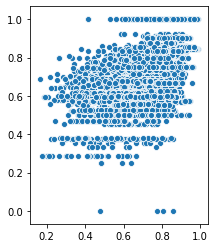

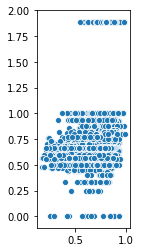

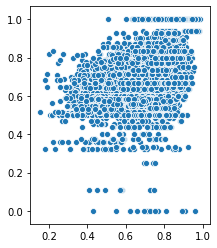

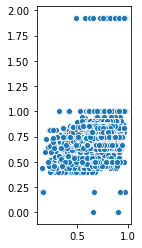

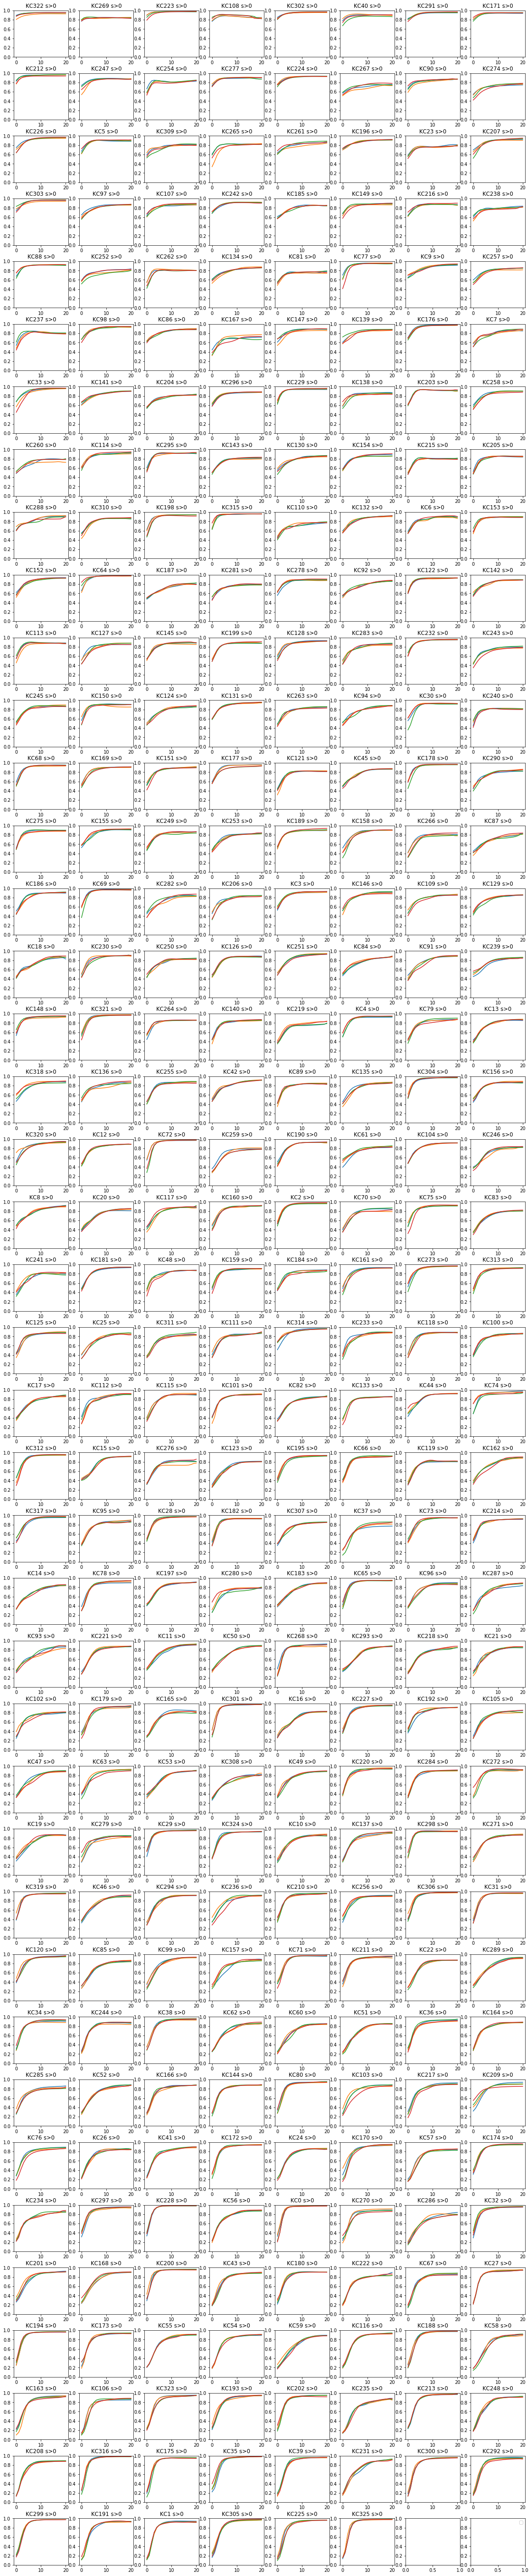

In [11]:
config_1 = Config(config_d1, projectdir)
config_1.batch_size = 1
trainer_1 = Trainer(config_1)
config_2 = Config(config_d2, projectdir)
config_2.batch_size = 1
trainer_2 = Trainer(config_2)
config_3 = Config(config_d3, projectdir)
config_3.batch_size = 1
trainer_3 = Trainer(config_3)
config_4 = Config(config_d4, projectdir)
config_4.batch_size = 1
trainer_4 = Trainer(config_4)

print('Evaluate models')
trainer_1.evaluate_model()
trainer_2.evaluate_model()
trainer_3.evaluate_model()
trainer_4.evaluate_model()

seq_size = config_1.sequence_size
simu = [[0]*i + [1]*(seq_size - i) for i in range(seq_size+1)]

simu_res1 = dict()
for v in range(config_1.n_skills):
    xs = []
    preds = []
    for s in simu:
        res = trainer_1.model.loss_batch(
            torch.Tensor([(v,a) for a in s]).unsqueeze(0),
            torch.Tensor([(v,a) for a in s]).unsqueeze(0),
            torch.BoolTensor([True]*seq_size).unsqueeze(0),)
        preds.append(res['pred_prob'][-1].item())
        xs.append(sum(s))
    simu_res1[v] = (xs, preds)
simu_res2 = dict()
for v in range(config_2.n_skills):
    xs = []
    preds = []
    for s in simu:
        res = trainer_2.model.loss_batch(
            torch.Tensor([(v,a) for a in s]).unsqueeze(0),
            torch.Tensor([(v,a) for a in s]).unsqueeze(0),
            torch.BoolTensor([True]*seq_size).unsqueeze(0),)
        preds.append(res['pred_prob'][-1].item())
        xs.append(sum(s))
    simu_res2[v] = (xs, preds)
simu_res3 = dict()
for v in range(config_3.n_skills):
    xs = []
    preds = []
    for s in simu:
        res = trainer_3.model.loss_batch(
            torch.Tensor([(v,a) for a in s]).unsqueeze(0),
            torch.Tensor([(v,a) for a in s]).unsqueeze(0),
            torch.BoolTensor([True]*seq_size).unsqueeze(0),)
        preds.append(res['pred_prob'][-1].item())
        xs.append(sum(s))
    simu_res3[v] = (xs, preds)
simu_res4 = dict()
for v in range(config_4.n_skills):
    xs = []
    preds = []
    for s in simu:
        res = trainer_4.model.loss_batch(
            torch.Tensor([(v,a) for a in s]).unsqueeze(0),
            torch.Tensor([(v,a) for a in s]).unsqueeze(0),
            torch.BoolTensor([True]*seq_size).unsqueeze(0),)
        preds.append(res['pred_prob'][-1].item())
        xs.append(sum(s))
    simu_res4[v] = (xs, preds)

asce1_simures1 = {k:v for k, v in sorted(simu_res1.items(), key=lambda it: it[1][1][-1] - it[1][1][0])}
desc1_simures1 = {k:v for k, v in sorted(simu_res1.items(), key=lambda it: it[1][1][0] - it[1][1][-1])}
asce2_simures2 = {k:v for k, v in sorted(simu_res2.items(), key=lambda it: it[1][1][-1] - it[1][1][0])}
desc2_simures2 = {k:v for k, v in sorted(simu_res2.items(), key=lambda it: it[1][1][0] - it[1][1][-1])}
asce1_simures2 = {k:simu_res2[k] for k in asce1_simures1.keys()}
desc1_simures2 = {k:simu_res2[k] for k in desc1_simures1.keys()}
asce2_simures1 = {k:simu_res1[k] for k in asce2_simures2.keys()}
desc2_simures1 = {k:simu_res1[k] for k in desc2_simures2.keys()}
desc1_simures3 = {k:simu_res3[k] for k in desc1_simures1.keys()}
desc1_simures4 = {k:simu_res4[k] for k in desc1_simures1.keys()}

h, w = 41, 8
figscale = 2.5
hspace = 0.35
fig, axs = plt.subplots(h, w, figsize=(w*figscale, h*figscale))
plt.subplots_adjust(hspace=hspace)
for i, (v, (xidx, sanity)) in enumerate(list(desc1_simures1.items())[:h*w]):
    ax = axs[i//(w), i%(w)]
    ax.set_ylim([0, 1])
    ax.set_title('KC{} s{}0'.format(v, '>' if sanity[-1]<sanity[0] else '<'))
    sns.lineplot(xidx, sanity, ax=ax)
    sns.lineplot(xidx, desc1_simures2[v][1], ax=ax)
    sns.lineplot(xidx, desc1_simures3[v][1], ax=ax)
    sns.lineplot(xidx, desc1_simures4[v][1], ax=ax)
plt.legend()
plt.show()

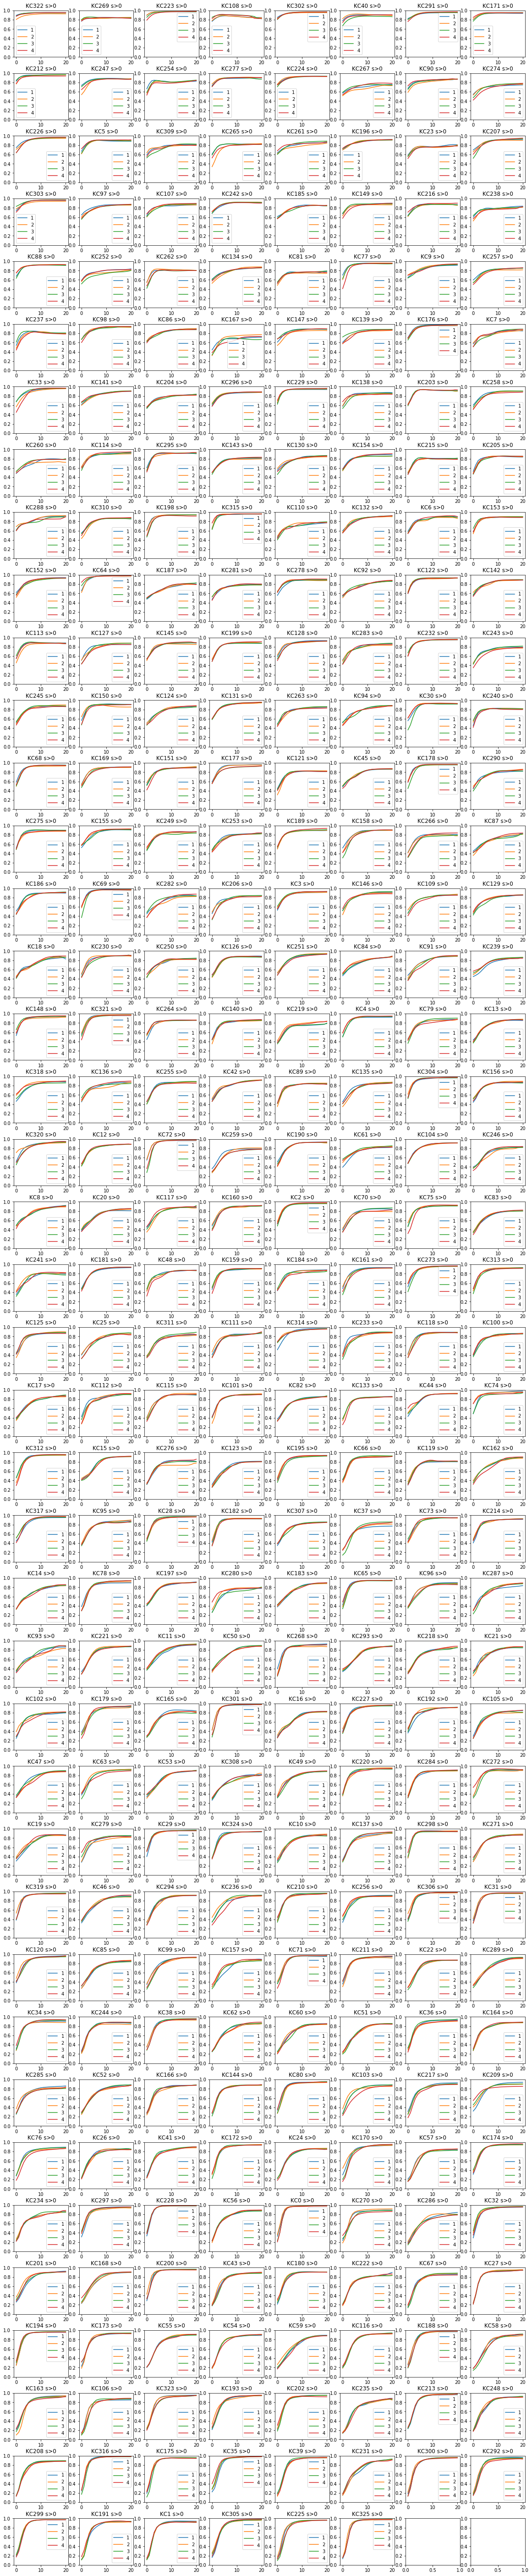

In [16]:
h, w = 41, 8
figscale = 2.5
hspace = 0.35
fig, axs = plt.subplots(h, w, figsize=(w*figscale, h*figscale))
plt.subplots_adjust(hspace=hspace)
for i, (v, (xidx, sanity)) in enumerate(list(desc1_simures1.items())[:h*w]):
    ax = axs[i//(w), i%(w)]
    ax.set_ylim([0, 1])
    ax.set_title('KC{} s{}0'.format(v, '>' if sanity[-1]<sanity[0] else '<'))
    sns.lineplot(xidx, sanity, ax=ax, label='1')
    sns.lineplot(xidx, desc1_simures2[v][1], ax=ax, label='2')
    sns.lineplot(xidx, desc1_simures3[v][1], ax=ax, label='3')
    sns.lineplot(xidx, desc1_simures4[v][1], ax=ax, label='4')
#     sns.lineplot(xidx, sanity, ax=ax)
#     sns.lineplot(xidx, desc1_simures2[v][1], ax=ax)
#     sns.lineplot(xidx, desc1_simures3[v][1], ax=ax)
#     sns.lineplot(xidx, desc1_simures4[v][1], ax=ax)
ax.legend()
plt.show()

## Compare ksv effects with NO pre-train

In [15]:
experiment_name = ''
expsoutdir = projectdir / 'output/z_200207_visual_compare_ksv_no-pre-train'
cp_rp_paths = []
for expdir in sorted(expsoutdir.iterdir()):
    # Checkpoints
    cpdir = expdir / 'checkpoints'
    lastcpdir = sorted(cpdir.iterdir())[-1]
    bestcp_path = sorted(lastcpdir.iterdir())[-1]
    print(bestcp_path)
    # Report
    rpdir = expdir / 'report'
    lastrpdir = sorted(rpdir.iterdir())[-1]
    rp_path = next(lastrpdir.glob('*.json'))
    print(rp_path)
    cp_rp_paths.append((bestcp_path, rp_path))

/code/output/z_200207_visual_compare_ksv_no-pre-train/ks000/checkpoints/20200207-0421/ksdkt_auc0.6639_e300.model
/code/output/z_200207_visual_compare_ksv_no-pre-train/ks000/report/20200207-0421/ksdkt.json
/code/output/z_200207_visual_compare_ksv_no-pre-train/ks025/checkpoints/20200207-0450/ksdkt_auc0.6637_e300.model
/code/output/z_200207_visual_compare_ksv_no-pre-train/ks025/report/20200207-0450/ksdkt.json
/code/output/z_200207_visual_compare_ksv_no-pre-train/ks050/checkpoints/20200207-0520/ksdkt_auc0.6637_e300.model
/code/output/z_200207_visual_compare_ksv_no-pre-train/ks050/report/20200207-0520/ksdkt.json
/code/output/z_200207_visual_compare_ksv_no-pre-train/ks075/checkpoints/20200207-0549/ksdkt_auc0.6636_e300.model
/code/output/z_200207_visual_compare_ksv_no-pre-train/ks075/report/20200207-0549/ksdkt.json
/code/output/z_200207_visual_compare_ksv_no-pre-train/ks100/checkpoints/20200207-0619/ksdkt_auc0.6634_e300.model
/code/output/z_200207_visual_compare_ksv_no-pre-train/ks100/report/

In [21]:
# Asteria
configdics = []
for checkpoint_path, report_path in cp_rp_paths:
    with open(report_path, 'r') as f:
        report = json.load(f)
        config_dic = report['config']
        config_dic['load_model'] = str(checkpoint_path)
        configdics.append(config_dic)

In [22]:
def get_simu_res(config_dic):
    config = Config(config_dic, projectdir)
    config.batch_size = 1
    trainer = Trainer(config)
    
    trainer.evaluate_model()


    seq_size = config.sequence_size
    simu = [[0]*i + [1]*(seq_size - i) for i in range(seq_size+1)]

    simu_res = dict()
    for v in range(config.n_skills):
        xs = []
        preds = []
        for s in simu:
            res = trainer.model.loss_batch(
                torch.Tensor([(v,a) for a in s]).unsqueeze(0),
                torch.Tensor([(v,a) for a in s]).unsqueeze(0),
                torch.BoolTensor([True]*seq_size).unsqueeze(0),)
            preds.append(res['pred_prob'][-1].item())
            xs.append(sum(s))
        simu_res[v] = (xs, preds)
    return simu_res


simures_list = []
for config_dic in configdics:
    simu_res = get_simu_res(config_dic)
    simures_list.append(simu_res)
    

In [23]:
base_res = None
descres_list = []
for simu_res in simures_list:
    if base_res is None:
        base_res = {k:v for k, v in sorted(simu_res.items(), key=lambda it: it[1][1][0] - it[1][1][-1])}
    else:
        desc_res = {k:simu_res[k] for k in base_res.keys()}
        descres_list.append(desc_res)

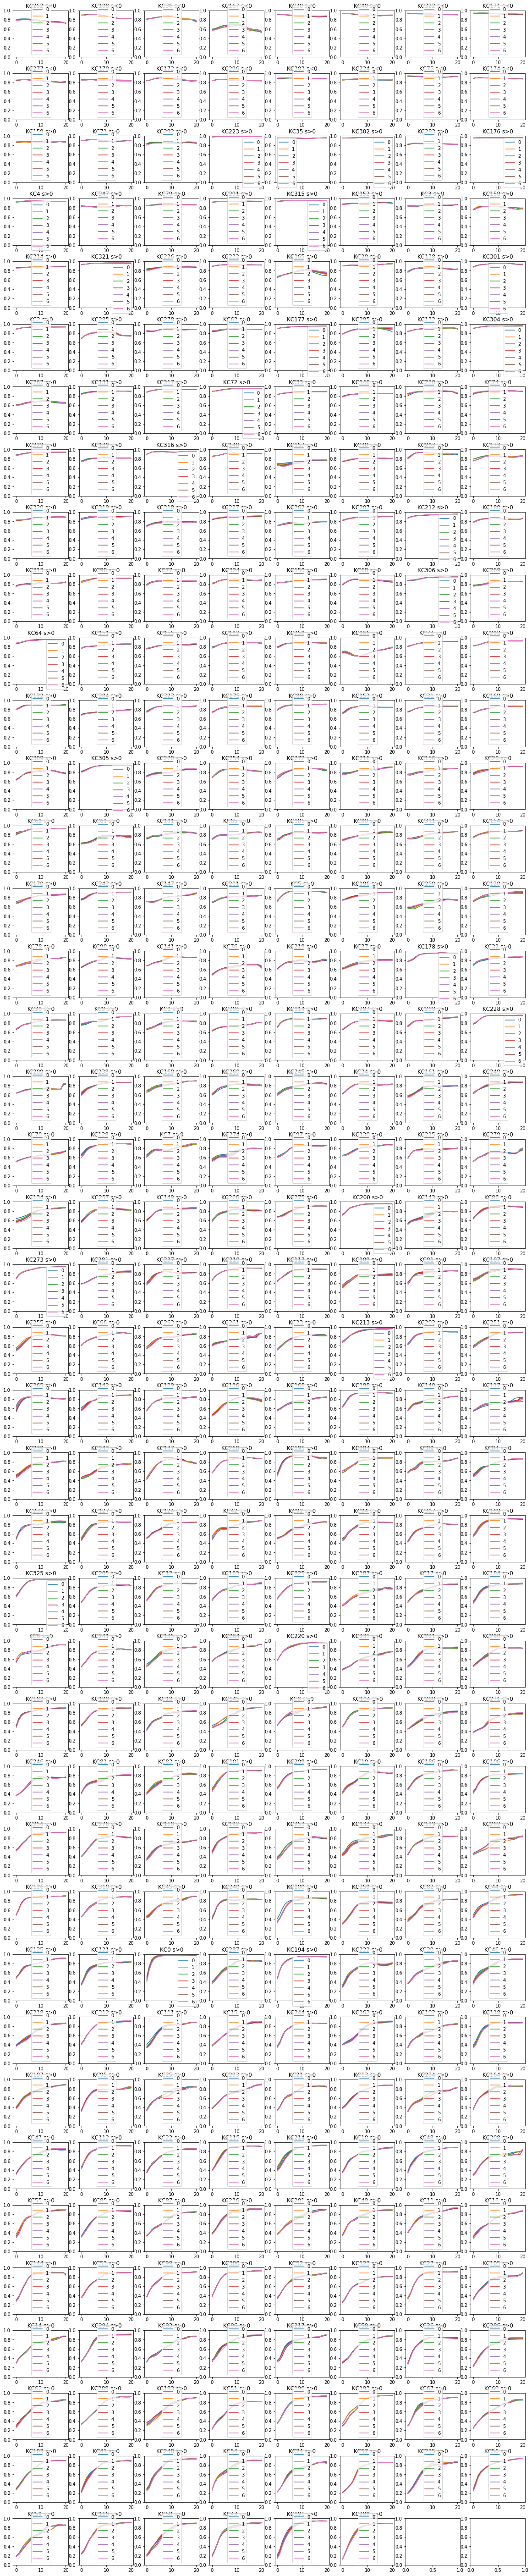

In [25]:
h, w = 41, 8
figscale = 2.5
hspace = 0.35
fig, axs = plt.subplots(h, w, figsize=(w*figscale, h*figscale))
plt.subplots_adjust(hspace=hspace)
for i, (v, (xidx, sanity)) in enumerate(list(base_res.items())[:h*w]):
    ax = axs[i//(w), i%(w)]
    ax.set_ylim([0, 1])
    ax.set_title('KC{} s{}0'.format(v, '>' if sanity[-1]<sanity[0] else '<'))
    sns.lineplot(xidx, sanity, ax=ax, label='0', palette="ch:2.5,.25")
    for i, desc_res in enumerate(descres_list):
        sns.lineplot(xidx, desc_res[v][1], ax=ax, label=str(i+1), palette="ch:2.5,.25")
ax.legend()
plt.show()

## Compare ksv effects with WITH pre-train

In [26]:
experiment_name = 'z_200207_visual_compare_ksv_pre-train'
expsoutdir = projectdir / 'output' / experiment_name
cp_rp_paths = []
for expdir in sorted(expsoutdir.iterdir()):
    # Checkpoints
    cpdir = expdir / 'checkpoints'
    lastcpdir = sorted(cpdir.iterdir())[-1]
    bestcp_path = sorted(lastcpdir.iterdir())[-1]
    print(bestcp_path)
    # Report
    rpdir = expdir / 'report'
    lastrpdir = sorted(rpdir.iterdir())[-1]
    rp_path = next(lastrpdir.glob('*.json'))
    print(rp_path)
    cp_rp_paths.append((bestcp_path, rp_path))

/code/output/z_200207_visual_compare_ksv_pre-train/ks000/checkpoints/20200207-0945/ksdkt_auc0.6669_e200.model
/code/output/z_200207_visual_compare_ksv_pre-train/ks000/report/20200207-0945/ksdkt.json
/code/output/z_200207_visual_compare_ksv_pre-train/ks025/checkpoints/20200207-1004/ksdkt_auc0.6674_e200.model
/code/output/z_200207_visual_compare_ksv_pre-train/ks025/report/20200207-1004/ksdkt.json
/code/output/z_200207_visual_compare_ksv_pre-train/ks050/checkpoints/20200207-1022/ksdkt_auc0.6672_e200.model
/code/output/z_200207_visual_compare_ksv_pre-train/ks050/report/20200207-1022/ksdkt.json
/code/output/z_200207_visual_compare_ksv_pre-train/ks075/checkpoints/20200207-1041/ksdkt_auc0.6672_e300.model
/code/output/z_200207_visual_compare_ksv_pre-train/ks075/report/20200207-1041/ksdkt.json
/code/output/z_200207_visual_compare_ksv_pre-train/ks100/checkpoints/20200207-1100/ksdkt_auc0.6672_e200.model
/code/output/z_200207_visual_compare_ksv_pre-train/ks100/report/20200207-1100/ksdkt.json
/code

In [27]:
# Asteria
configdics = []
for checkpoint_path, report_path in cp_rp_paths:
    with open(report_path, 'r') as f:
        report = json.load(f)
        config_dic = report['config']
        config_dic['load_model'] = str(checkpoint_path)
        configdics.append(config_dic)

INFO:ksdkt/ks000:PyTorch: 1.3.0
INFO:ksdkt/ks000:Using Device: cuda
INFO:ksdkt/ks000:train_dl.dataset size: 29116
INFO:ksdkt/ks000:eval_dl.dataset size: 5897
INFO:ksdkt/ks000:The model has 558,904 trainable parameters
INFO:ksdkt/ks000:Starting evaluation
INFO:ksdkt/ks000:	Valid Loss: 0.557936	AUC: 0.680465
INFO:ksdkt/ks000:	Valid KSV AUC: 0.992379
INFO:ksdkt/ks000:	W1: 0.0264242	W2: 0.00144004
INFO:ksdkt/ks000:At 05:13 0m 10s passed ( - 0m 0s til 05:13)
INFO:ksdkt/ks000:Good: 326 	 Bad: 0
INFO:ksdkt/ks025:PyTorch: 1.3.0
INFO:ksdkt/ks025:Using Device: cuda
INFO:ksdkt/ks025:train_dl.dataset size: 28578
INFO:ksdkt/ks025:eval_dl.dataset size: 6435
INFO:ksdkt/ks025:The model has 558,904 trainable parameters
INFO:ksdkt/ks025:Starting evaluation
INFO:ksdkt/ks025:	Valid Loss: 0.577059	AUC: 0.676906
INFO:ksdkt/ks025:	Valid KSV AUC: 0.99264
INFO:ksdkt/ks025:	W1: 0.0262742	W2: 0.00142138
INFO:ksdkt/ks025:At 05:13 0m 11s passed ( - 0m 0s til 05:13)
INFO:ksdkt/ks025:Good: 326 	 Bad: 0
INFO:ksdkt/ks

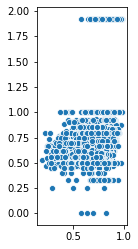

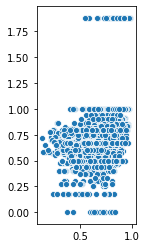

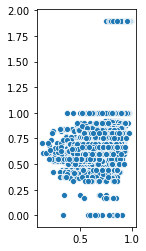

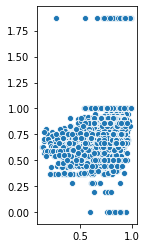

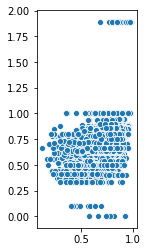

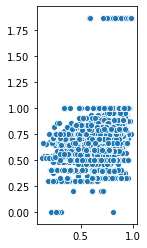

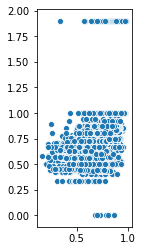

In [28]:
def get_simu_res(config_dic):
    config = Config(config_dic, projectdir)
    config.batch_size = 1
    trainer = Trainer(config)
    
    trainer.evaluate_model()


    seq_size = config.sequence_size
    simu = [[0]*i + [1]*(seq_size - i) for i in range(seq_size+1)]

    simu_res = dict()
    for v in range(config.n_skills):
        xs = []
        preds = []
        for s in simu:
            res = trainer.model.loss_batch(
                torch.Tensor([(v,a) for a in s]).unsqueeze(0),
                torch.Tensor([(v,a) for a in s]).unsqueeze(0),
                torch.BoolTensor([True]*seq_size).unsqueeze(0),)
            preds.append(res['pred_prob'][-1].item())
            xs.append(sum(s))
        simu_res[v] = (xs, preds)
    return simu_res


simures_list = []
for config_dic in configdics:
    simu_res = get_simu_res(config_dic)
    simures_list.append(simu_res)
    

In [29]:
base_res = None
descres_list = []
for simu_res in simures_list:
    if base_res is None:
        base_res = {k:v for k, v in sorted(simu_res.items(), key=lambda it: it[1][1][0] - it[1][1][-1])}
    else:
        desc_res = {k:simu_res[k] for k in base_res.keys()}
        descres_list.append(desc_res)

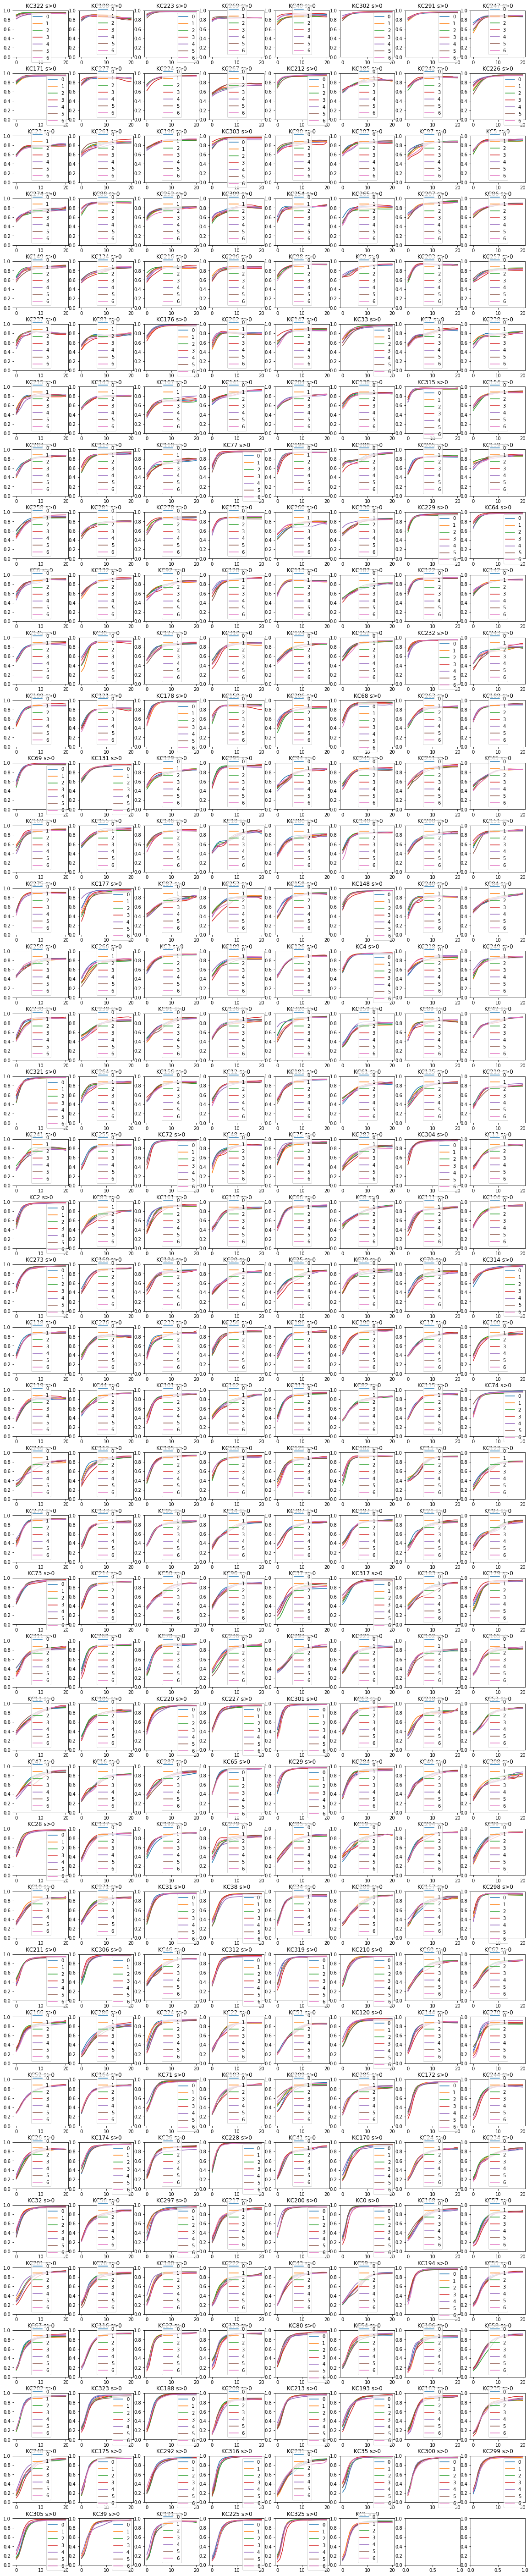

In [30]:
h, w = 41, 8
figscale = 2.5
hspace = 0.35
fig, axs = plt.subplots(h, w, figsize=(w*figscale, h*figscale))
plt.subplots_adjust(hspace=hspace)
for i, (v, (xidx, sanity)) in enumerate(list(base_res.items())[:h*w]):
    ax = axs[i//(w), i%(w)]
    ax.set_ylim([0, 1])
    ax.set_title('KC{} s{}0'.format(v, '>' if sanity[-1]<sanity[0] else '<'))
    sns.lineplot(xidx, sanity, ax=ax, label='0', palette="ch:2.5,.25")
    for i, desc_res in enumerate(descres_list):
        sns.lineplot(xidx, desc_res[v][1], ax=ax, label=str(i+1), palette="ch:2.5,.25")
ax.legend()
plt.show()

In [59]:
better_sanity = dict()
hard_good = defaultdict(int)
soft_bad = defaultdict(int)
for sid, (v, (xidx, sanity)) in enumerate(base_res.items()):
    soft_bad['base_res'] += (sanity[0] - sanity[-1]) < 0
    hard_good['base_res'] += sorted(sanity, reverse=True) == sanity
    better_sanity[sid] = (0, sanity[-1] - sanity[0])
    for i, desc_res in enumerate(descres_list):
        sanity = desc_res[v][1]
        desc_res_idxname = 'desc_res{}'.format(i+1)
        soft_bad[desc_res_idxname] += (sanity[0] - sanity[-1]) < 0
        hard_good[desc_res_idxname] += sorted(sanity, reverse=True) == sanity
        if (sanity[-1] - sanity[0]) > better_sanity[sid][1]:
            better_sanity[sid] = (i+1, sanity[-1] - sanity[0])
soft_bad
hard_bad
# better_sanity
dict(pd.Series([resid for resid, score in better_sanity.values()]).value_counts())

{4: 90, 0: 57, 5: 41, 1: 38, 2: 37, 3: 34, 6: 29}

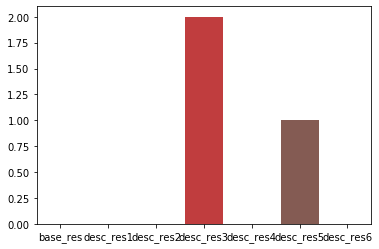

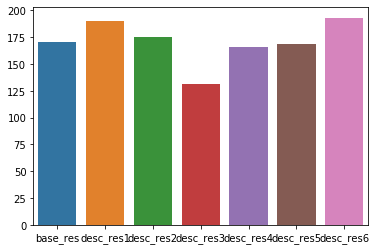

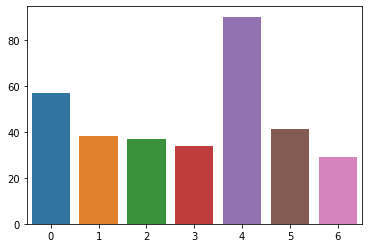

{4: 90, 0: 57, 5: 41, 1: 38, 2: 37, 3: 34, 6: 29}

In [64]:
sns.barplot(x=list(soft_bad.keys()), y=list(soft_bad.values()))
plt.show()

sns.barplot(x=list(hard_good.keys()), y=list(hard_good.values()))
plt.show()

better_san = dict(pd.Series([resid for resid, score in better_sanity.values()]).value_counts())
sns.barplot(x=list(better_san.keys()), y=list(better_san.values()))
plt.show()
better_san

## Compare ksv effects with WITH pre-train but NO PAD

In [66]:
experiment_name = 'z_200207_visual_compare_ksv_pre-train_no-pad'
expsoutdir = projectdir / 'output' / experiment_name
cp_rp_paths = []
for expdir in sorted(expsoutdir.iterdir()):
    # Checkpoints
    cpdir = expdir / 'checkpoints'
    lastcpdir = sorted(cpdir.iterdir())[-1]
    bestcp_path = sorted(lastcpdir.iterdir())[-1]
    print(bestcp_path)
    # Report
    rpdir = expdir / 'report'
    lastrpdir = sorted(rpdir.iterdir())[-1]
    rp_path = next(lastrpdir.glob('*.json'))
    print(rp_path)
    cp_rp_paths.append((bestcp_path, rp_path))

/code/output/z_200207_visual_compare_ksv_pre-train_no-pad/ks000/checkpoints/20200207-1546/ksdkt_auc0.6659_e200.model
/code/output/z_200207_visual_compare_ksv_pre-train_no-pad/ks000/report/20200207-1546/ksdkt.json
/code/output/z_200207_visual_compare_ksv_pre-train_no-pad/ks025/checkpoints/20200207-1557/ksdkt_auc0.6668_e300.model
/code/output/z_200207_visual_compare_ksv_pre-train_no-pad/ks025/report/20200207-1557/ksdkt.json
/code/output/z_200207_visual_compare_ksv_pre-train_no-pad/ks050/checkpoints/20200207-1608/ksdkt_auc0.6662_e200.model
/code/output/z_200207_visual_compare_ksv_pre-train_no-pad/ks050/report/20200207-1608/ksdkt.json
/code/output/z_200207_visual_compare_ksv_pre-train_no-pad/ks075/checkpoints/20200207-1619/ksdkt_auc0.6662_e300.model
/code/output/z_200207_visual_compare_ksv_pre-train_no-pad/ks075/report/20200207-1619/ksdkt.json


In [67]:
# Asteria
configdics = []
for checkpoint_path, report_path in cp_rp_paths:
    with open(report_path, 'r') as f:
        report = json.load(f)
        config_dic = report['config']
        config_dic['load_model'] = str(checkpoint_path)
        configdics.append(config_dic)

INFO:ksdkt/ks000:PyTorch: 1.3.0
INFO:ksdkt/ks000:Using Device: cuda
INFO:ksdkt/ks000:train_dl.dataset size: 26832
INFO:ksdkt/ks000:eval_dl.dataset size: 6497
INFO:ksdkt/ks000:The model has 558,904 trainable parameters
INFO:ksdkt/ks000:Starting evaluation
INFO:ksdkt/ks000:	Valid Loss: 0.568682	AUC: 0.67392
INFO:ksdkt/ks000:	Valid KSV AUC: 0.992516
INFO:ksdkt/ks000:	W1: 0.0266445	W2: 0.00144782
INFO:ksdkt/ks000:At 07:30 0m 19s passed ( - 0m 0s til 07:30)
INFO:ksdkt/ks000:Good: 326 	 Bad: 0
INFO:ksdkt/ks025:PyTorch: 1.3.0
INFO:ksdkt/ks025:Using Device: cuda
INFO:ksdkt/ks025:train_dl.dataset size: 26555
INFO:ksdkt/ks025:eval_dl.dataset size: 6774
INFO:ksdkt/ks025:The model has 558,904 trainable parameters
INFO:ksdkt/ks025:Starting evaluation
INFO:ksdkt/ks025:	Valid Loss: 0.549932	AUC: 0.695607
INFO:ksdkt/ks025:	Valid KSV AUC: 0.99258
INFO:ksdkt/ks025:	W1: 0.0276172	W2: 0.00158625
INFO:ksdkt/ks025:At 07:31 0m 20s passed ( - 0m 0s til 07:31)
INFO:ksdkt/ks025:Good: 325 	 Bad: 1
INFO:ksdkt/ks0

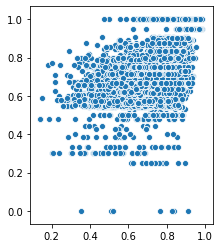

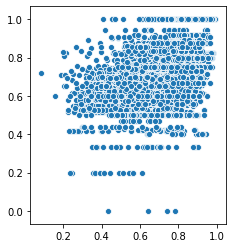

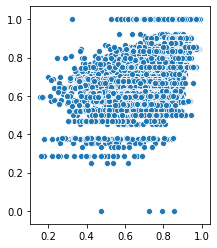

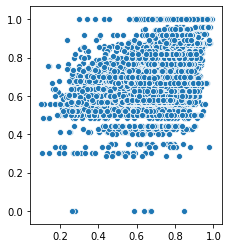

In [68]:
def get_simu_res(config_dic):
    config = Config(config_dic, projectdir)
    config.batch_size = 1
    trainer = Trainer(config)
    
    trainer.evaluate_model()


    seq_size = config.sequence_size
    simu = [[0]*i + [1]*(seq_size - i) for i in range(seq_size+1)]

    simu_res = dict()
    for v in range(config.n_skills):
        xs = []
        preds = []
        for s in simu:
            res = trainer.model.loss_batch(
                torch.Tensor([(v,a) for a in s]).unsqueeze(0),
                torch.Tensor([(v,a) for a in s]).unsqueeze(0),
                torch.BoolTensor([True]*seq_size).unsqueeze(0),)
            preds.append(res['pred_prob'][-1].item())
            xs.append(sum(s))
        simu_res[v] = (xs, preds)
    return simu_res


simures_list = []
for config_dic in configdics:
    simu_res = get_simu_res(config_dic)
    simures_list.append(simu_res)
    

In [69]:
base_res = None
descres_list = []
for simu_res in simures_list:
    if base_res is None:
        base_res = {k:v for k, v in sorted(simu_res.items(), key=lambda it: it[1][1][0] - it[1][1][-1])}
    else:
        desc_res = {k:simu_res[k] for k in base_res.keys()}
        descres_list.append(desc_res)

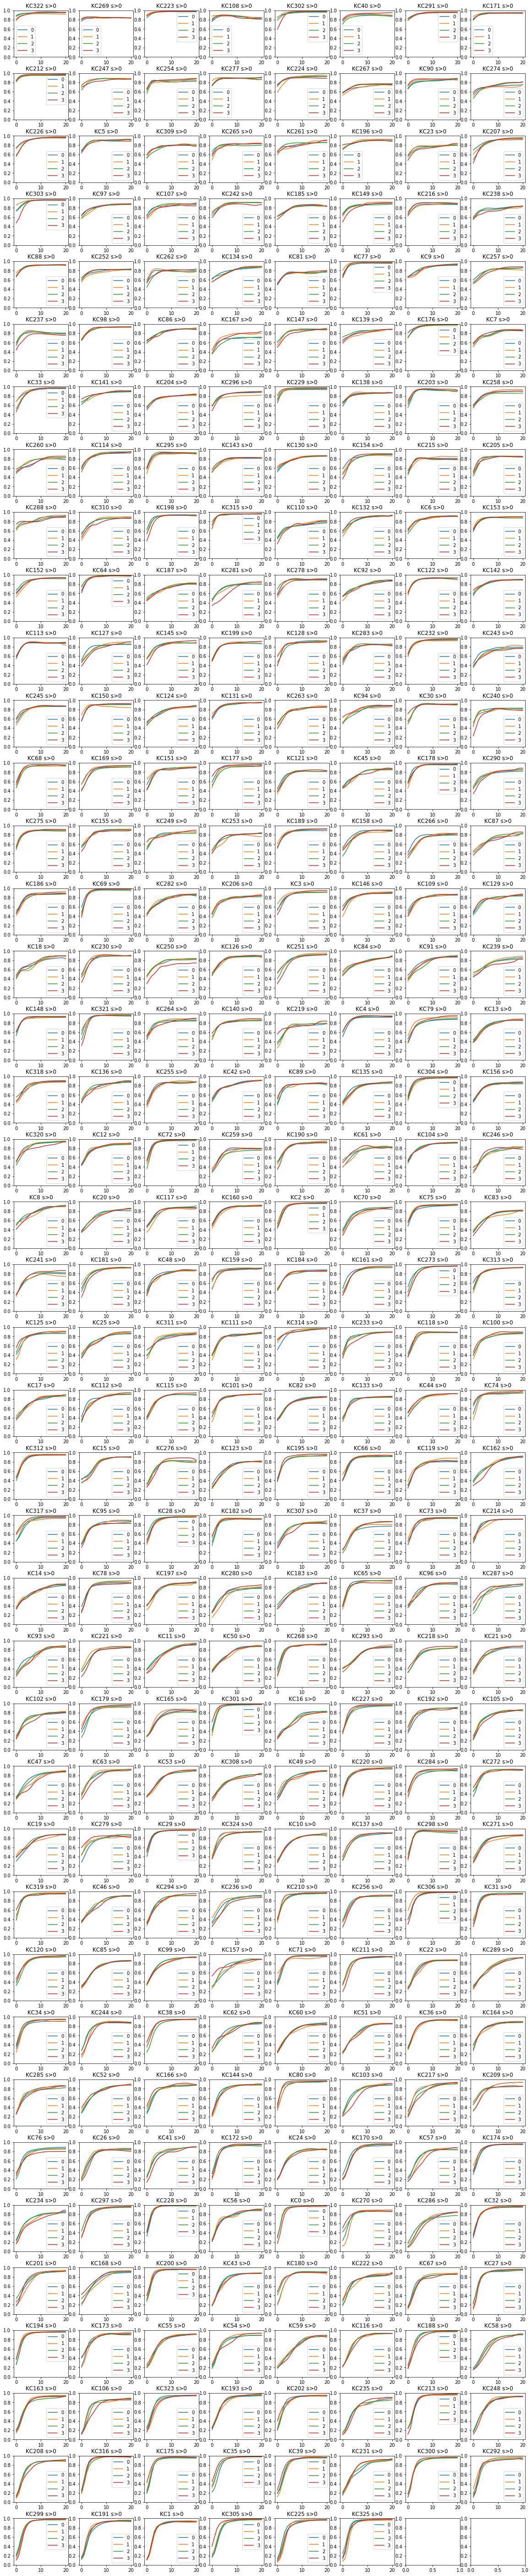

In [70]:
h, w = 41, 8
figscale = 2.5
hspace = 0.35
fig, axs = plt.subplots(h, w, figsize=(w*figscale, h*figscale))
plt.subplots_adjust(hspace=hspace)
for i, (v, (xidx, sanity)) in enumerate(list(base_res.items())[:h*w]):
    ax = axs[i//(w), i%(w)]
    ax.set_ylim([0, 1])
    ax.set_title('KC{} s{}0'.format(v, '>' if sanity[-1]<sanity[0] else '<'))
    sns.lineplot(xidx, sanity, ax=ax, label='0', palette="ch:2.5,.25")
    for i, desc_res in enumerate(descres_list):
        sns.lineplot(xidx, desc_res[v][1], ax=ax, label=str(i+1), palette="ch:2.5,.25")
ax.legend()
plt.show()

In [71]:
better_sanity = dict()
hard_good = defaultdict(int)
soft_bad = defaultdict(int)
for sid, (v, (xidx, sanity)) in enumerate(base_res.items()):
    soft_bad['base_res'] += (sanity[0] - sanity[-1]) < 0
    hard_good['base_res'] += sorted(sanity, reverse=True) == sanity
    better_sanity[sid] = (0, sanity[-1] - sanity[0])
    for i, desc_res in enumerate(descres_list):
        sanity = desc_res[v][1]
        desc_res_idxname = 'desc_res{}'.format(i+1)
        soft_bad[desc_res_idxname] += (sanity[0] - sanity[-1]) < 0
        hard_good[desc_res_idxname] += sorted(sanity, reverse=True) == sanity
        if (sanity[-1] - sanity[0]) > better_sanity[sid][1]:
            better_sanity[sid] = (i+1, sanity[-1] - sanity[0])
soft_bad
hard_bad
# better_sanity
dict(pd.Series([resid for resid, score in better_sanity.values()]).value_counts())

{0: 100, 2: 85, 3: 75, 1: 66}

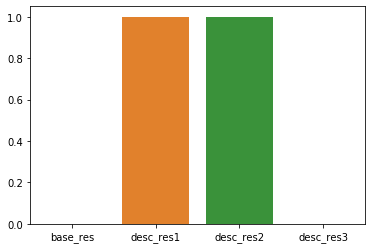

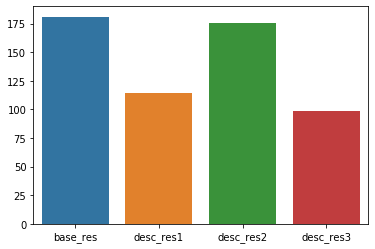

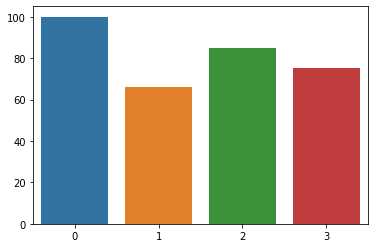

{0: 100, 2: 85, 3: 75, 1: 66}

In [72]:
sns.barplot(x=list(soft_bad.keys()), y=list(soft_bad.values()))
plt.show()

sns.barplot(x=list(hard_good.keys()), y=list(hard_good.values()))
plt.show()

better_san = dict(pd.Series([resid for resid, score in better_sanity.values()]).value_counts())
sns.barplot(x=list(better_san.keys()), y=list(better_san.values()))
plt.show()
better_san